# 1. 多项式逻辑回归
## 1.1 数据集说明
$$

X=\begin{bmatrix}
x_{0,0} & x_{0,1} \\
\vdots & \vdots \\
x_{117,0} & x_{117,1}
\end{bmatrix}
,
Y = \begin{bmatrix}
y_{0} \\
\vdots \\
y_{117}
\end{bmatrix}
\\
X_{0} = \begin{bmatrix}
x_{0,0}  \\
\vdots \\
x_{117,0}
\end{bmatrix}
,
X_{1} = \begin{bmatrix}
x_{0,1}  \\
\vdots \\
x_{117,1}
\end{bmatrix}
\\
X_{ploy} = \begin{bmatrix}
1 & X_{0} & X_{1} & X_{0}^2 & X_{0}X_{1} & X_{1}^2 & X_{0}^3 & X_{0}^2X_{,1} & X_{0}X_{1}^2 & X_{1}^3 \\

\end{bmatrix}
\\
W = 
\begin{bmatrix}
\omega_{0} & \omega_{1} & \omega_{2} & \omega_{3} & \omega_{4} & \omega_{5} & \omega_{6} & \omega_{7} & \omega_{8} & \omega_{9}
\end{bmatrix}
\\
\hat{Y} = sigmoid(X_{ploy}W)
\\

\nabla W \approx X_{ploy}^T(\hat{Y} - Y) \\

核心迭代公式: W = W - \eta\nabla W \\
损失函数: cost = \frac{1}{m}\sum_{i=1}^{m}(-y_i\ln(\hat{y}_i) - (1-y_i)\ln(1-\hat{y}_i))

$$





In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures

scale = False


data = np.genfromtxt("LR-testSet2.txt", delimiter=",")
x_data = data[:, :-1]
y_data = data[:, -1, np.newaxis]


def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []

    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i, 0])
            y0.append(x_data[i, 1])
        else:
            x1.append(x_data[i, 0])
            y1.append(x_data[i, 1])

    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    plt.legend(handles=[scatter0, scatter1], labels=['label0', 'label1'], loc='best')

## 1.2 数据集展示

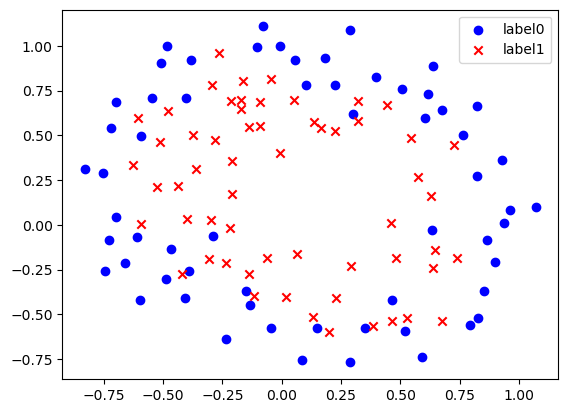

In [33]:
plot() 
plt.show()

In [34]:

poly_reg = PolynomialFeatures(degree=3)
x_poly = poly_reg.fit_transform(x_data)


def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat * ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat * ws)))
    return np.sum(left + right) / -(len(xMat))


def gradAscent(xArr, yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)

    lr = 0.03
    epochs = 50000
    costList = []
    m, n = np.shape(xMat)
    ws = np.mat(np.ones((n, 1)))

    for i in range(epochs + 1):
        h = sigmoid(xMat * ws)
        ws_grad = xMat.T * (h - yMat) / m
        ws = ws - lr * ws_grad

        if i % 50 == 0:
            costList.append(cost(xMat, yMat, ws))
    return ws, costList

## 1.2 绘制权重w的计算结果以及等高线图

### 1.2.1 绘制权重w的计算结果

In [35]:
import warnings

# 忽略DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
ws, costList = gradAscent(x_poly, y_data)
for i in range(len(ws)):
    print("w%d = %f" % (i, ws[i]))


w0 = 4.167873
w1 = 2.722135
w2 = 4.551200
w3 = -9.761090
w4 = -5.348802
w5 = -8.514580
w6 = -0.559504
w7 = -1.554182
w8 = -0.759298
w9 = -2.885739


### 1.2.2 绘制等高线图

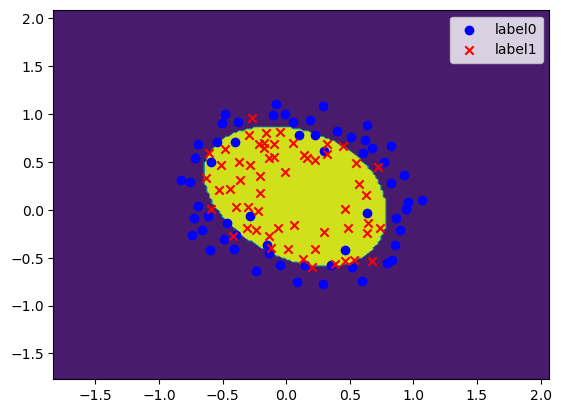

In [36]:
x_min, x_max = x_data[:, 0].min() - 1, x_data[:, 0].max() + 1
y_min, y_max = x_data[:, 1].min() - 1, x_data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
z = sigmoid(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]).dot(
    np.array(ws)))  
for i in range(len(z)):
    if z[i] > 0.5:
        z[i] = 1
    else:
        z[i] = 0
z = z.reshape(xx.shape)

cs = plt.contourf(xx, yy, z)
plot()
plt.show()

## 1.3 预测与评估
### 1.3.1 各类参数评估

In [37]:
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(x_poly, ws)

print(classification_report(y_data, predictions))

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.85        60
         1.0       0.83      0.86      0.85        58

    accuracy                           0.85       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.85      0.85      0.85       118



### 1.4.2 绘制损失函数曲线

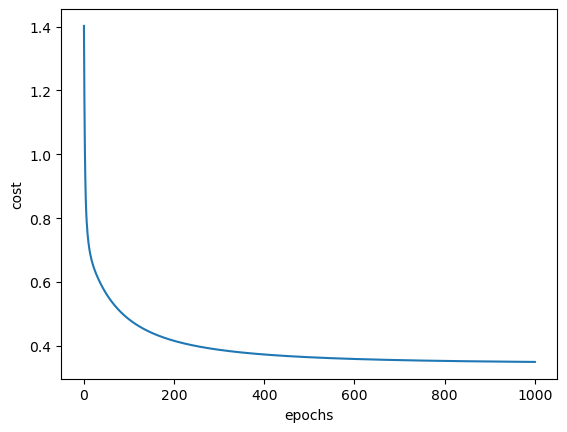

In [38]:
plt.plot(range(len(costList)), costList)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

# 2. 逻辑回归
与多项式逻辑回归相似，不同点在于 _X_poly_ 的生成方式不同,由于_X_poly_改变，权重ws的计算方式也会改变，其中第一项变为了偏置项

$$
X_{ploy} = \begin{bmatrix}
1 & X_{0} & X_{1} \\
\end{bmatrix}
\\
W = 
\begin{bmatrix}
b & \omega_{0} & \omega_{1} \\
\end{bmatrix}
$$


## 2.1 数据集展示

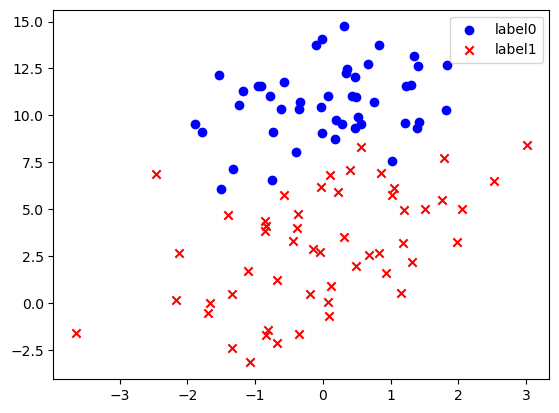

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from sklearn import preprocessing

scale = False

data = np.genfromtxt("LR-testSet.csv", delimiter=",")
x_data = data[:, :-1]
y_data = data[:, -1]


def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i, 0])
            y0.append(x_data[i, 1])
        else:
            x1.append(x_data[i, 0])
            y1.append(x_data[i, 1])

    scatter0 = plt.scatter(x0, y0, c='b', marker='o')
    scatter1 = plt.scatter(x1, y1, c='r', marker='x')
    plt.legend(handles=[scatter0, scatter1], labels=['label0', 'label1'], loc='best')


plot()
plt.show()

## 2.2 绘制权重w的计算结果以及决策边界
### 2.2.1 绘制权重w的计算结果

In [40]:

x_data = data[:, :-1]
y_data = data[:, -1, np.newaxis]


X_data = np.concatenate((np.ones((100, 1)), x_data), axis=1)


def sigmoid(x):
    return 1.0 / (1 + np.exp(-x))


def cost(xMat, yMat, ws):
    left = np.multiply(yMat, np.log(sigmoid(xMat * ws)))
    right = np.multiply(1 - yMat, np.log(1 - sigmoid(xMat * ws)))
    return np.sum(left + right) / -(len(xMat))


def gradAscent(xArr, yArr):
    if scale == True:
        xArr = preprocessing.scale(xArr)
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)

    lr = 0.001
    epochs = 10000
    costList = []
    m, n = np.shape(xMat)
    ws = np.mat(np.ones((n, 1)))

    for i in range(epochs + 1):
        h = sigmoid(xMat * ws)
        ws_grad = xMat.T * (h - yMat) / m
        ws = ws - lr * ws_grad

        if i % 50 == 0:
            costList.append(cost(xMat, yMat, ws))
    return ws, costList


ws, costList = gradAscent(X_data, y_data)
for i in range(len(ws)):
    if i == 0:
        print("b = %f" % (ws[i]))
    else:
        print("w%d = %f" % (i, ws[i]))

b = 2.058364
w1 = 0.351058
w2 = -0.363413


### 2.2.2 绘制决策边界

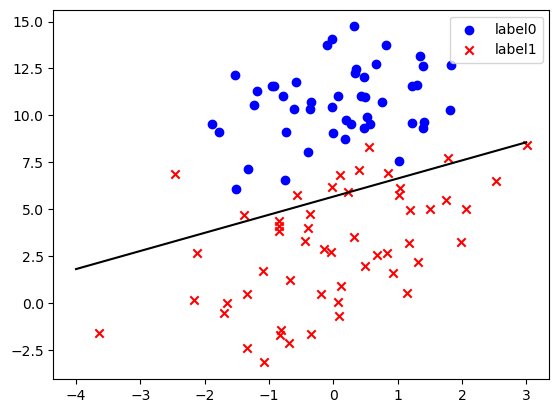

In [41]:
plot()
x_test = [[-4], [3]]
y_test = (-ws[0] - x_test * ws[1]) / ws[2]
plt.plot(x_test, y_test, 'k')
plt.show()

## 2.3 预测与评估
### 2.3.1 损失函数曲线

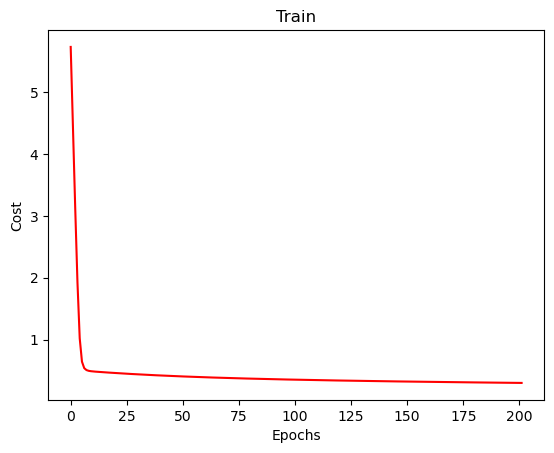

In [42]:
x = np.linspace(0, len(costList), 201)
plt.plot(x, costList, c='r')
plt.title('Train')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

### 2.3.2 各类参数评估及预测

In [43]:
def predict(x_data, ws):
    if scale == True:
        x_data = preprocessing.scale(x_data)
    xMat = np.mat(x_data)
    ws = np.mat(ws)
    return [1 if x >= 0.5 else 0 for x in sigmoid(xMat*ws)]

predictions = predict(X_data, ws)
cr = classification_report(y_data, predictions)
print(cr)


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        47
         1.0       1.00      0.81      0.90        53

    accuracy                           0.90       100
   macro avg       0.91      0.91      0.90       100
weighted avg       0.92      0.90      0.90       100

